# ***`Next D'or Man`***

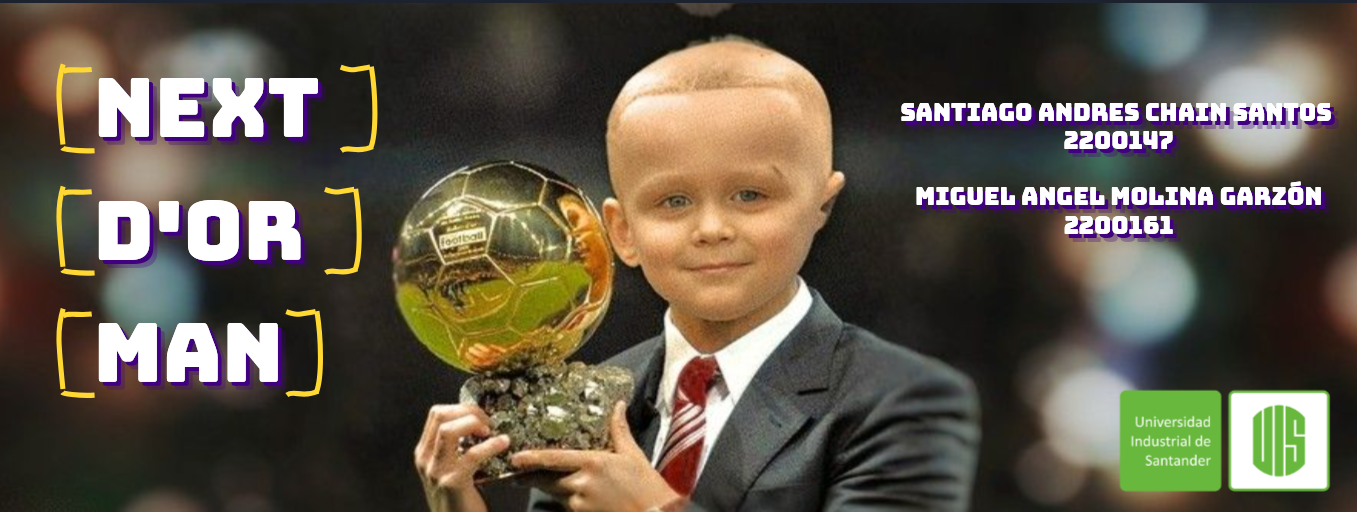

En este proyecto se buscará predecir que jugador de Fútbol será el mejor del mundo (Balón de oro) tanto en la actualidad como en los próximos años basandonos en diferentes aspectos dados por el videojuego FIFA, donde se representa la calidad de los jugadores en diferentes tipos de estadisticas, dando como el mejor de estos, al jugador que más valoración general presente.

Tambien se tendrá en cuenta el equipo en que juegue, su selección, la calidad de estas, entre otros.

In [107]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [108]:
dataset = pd.read_csv("/content/drive/MyDrive/IA/dataset.csv", sep=',')
dataset.head(10)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,87,81,87,65,62,65,61,56,61,23
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,73,79,73,83,88,83,85,90,85,23


Borramos columnas innecesarias y miramos la forma resultante de nuestro dataset para iniciar el análisis

In [109]:
df = dataset.drop(['Image Link','Club Jersey Number','National Team Image Link','National Team Jersey Number','Skill Moves', 'On Loan','LW Rating', 'LF Rating', 'CF Rating', 'RF Rating', 'RW Rating',
       'CAM Rating', 'LM Rating', 'CM Rating', 'RM Rating', 'LWB Rating', 'CDM Rating', 'RWB Rating', 'LB Rating', 'CB Rating', 'RB Rating',
       'GK Rating','National Team Position', 'Attacking Work Rate', 'Defensive Work Rate','Joined On', 'Weak Foot Rating','Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking',
       'Goalkeeper Positioning', 'Goalkeeper Reflexes','ST Rating'], axis=1)

df = df.drop(1584, axis=0) #Acá se borra un jugador repetido en el df
df = df.reset_index(drop=True)

In [110]:
print(df.shape)

(18538, 56)


# ***ANÁLISIS***

# **10 Mejores Jugadores Actualmente**

In [111]:
top_10 = df.sort_values('Overall', ascending=False).head(10)
top_10 = top_10.loc[:, ['Full Name', 'Nationality', 'Overall']]
top_10.head()

,Full Name,Nationality,Overall
0,Lionel Messi,Argentina,91
2,Robert Lewandowski,Poland,91
3,Kevin De Bruyne,Belgium,91
4,Kylian Mbappé,France,91
1,Karim Benzema,France,91


Acá podemos ver los 10 mejores jugadores del mundo actualmente según las valoraciones dadas por el dataset, estando empatados jugadores como Lionel Messi, Robert Lewandowski, Kevin de Bruyne, Kylian Mbappe y Karim Benzema.



# **10 Mayores Promesas**

<ipython-input-112-200bf817b7d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_promesas['Posible Crecimiento'] = df_promesas['Potential'] - df_promesas['Overall']


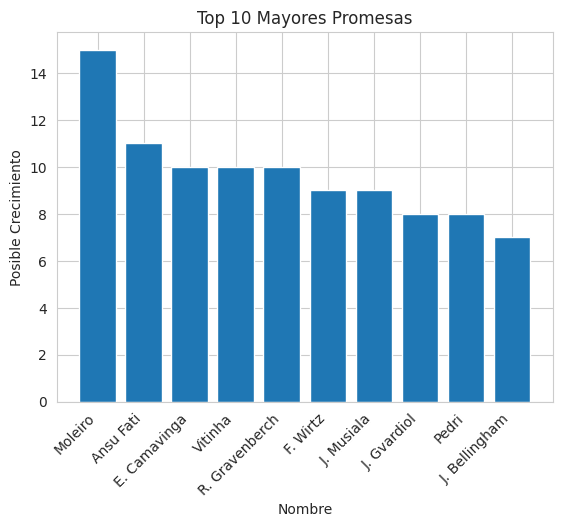

,Full Name,Nationality,Club Name,Overall,Potential,Posible Crecimiento
1713,Alberto Moleiro González,Spain,Unión Deportiva Las Palmas,75,90,15
527,Anssumane Fati,Spain,FC Barcelona,79,90,11
541,Eduardo Camavinga,France,Real Madrid CF,79,89,10
534,Vítor Machado Ferreira,Portugal,Paris Saint-Germain,79,89,10
526,Ryan Gravenberch,Netherlands,FC Bayern München,79,89,10
225,Florian Wirtz,Germany,Bayer 04 Leverkusen,82,91,9
302,Jamal Musiala,Germany,FC Bayern München,81,90,9
301,Joško Gvardiol,Croatia,RB Leipzig,81,89,8
82,Pedro González López,Spain,FC Barcelona,85,93,8
124,Jude Bellingham,England,Borussia Dortmund,84,91,7


In [112]:
df_promesas = df[df['Potential'] >= 89]
df_promesas['Posible Crecimiento'] = df_promesas['Potential'] - df_promesas['Overall']
top_10 = df_promesas.sort_values('Posible Crecimiento', ascending=False).head(10)

plt.bar(top_10['Known As'], top_10['Posible Crecimiento'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nombre')
plt.ylabel('Posible Crecimiento')

plt.title('Top 10 Mayores Promesas')
plt.show()
top_10.loc[:, ['Full Name', 'Nationality', 'Club Name', 'Overall', 'Potential' ,'Posible Crecimiento']]



**- REPUTACIÓN INTERNACIONAL SEGÚN ESTILO DE JUEGO**

La reputación internacional juega un papel clave a la hora de emanar en la valoracion general de un jugador. Ahora veremos que jugadores son los que presentan mayor reputación.

Primero, se crea la columna 'Estilo' donde se mostrará si el jugador es Atacante, Mediocampista, Defensa o Portero según la posición natural de cada jugador.

In [113]:
condiciones = [df['Best Position'].isin(['RW', 'ST', 'LW','CF','LF','RF']),
               df['Best Position'].isin(['RM', 'LM', 'CAM','CM','CDM']),
              df['Best Position'] == 'GK', True]

valores = ['Atacante', 'Mediocampista', 'Portero', 'Defensa']

df['Estilo'] = np.select(condiciones, valores, default=np.nan)
df.dropna(subset=['Estilo'], inplace=True)

Se calcula el promedio de reputación Internacional según Estilo.

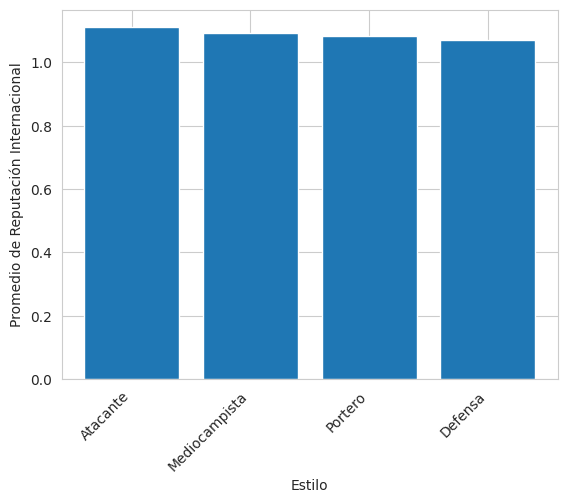

In [114]:
promedio = df.groupby('Estilo')['International Reputation'].mean().sort_values(ascending=False)

fig, ax = plt.subplots()

ax.bar(promedio.index, promedio.values)
plt.xticks(rotation=45, ha='right')

ax.set_xlabel('Estilo')
ax.set_ylabel('Promedio de Reputación Internacional')

plt.show()

Con esta grafica podemos evidenciar que los valores correspondientes a la reputación internacional no son muy dependientes de su posición de juego. Por lo que la reputación internacional, que juega un papel clave en la valoración del jugador, depende de la calidad del mismo.

Sin embargo, aunque estos numeros sean cercanos, los atacantes poseen una mayor reputación internacional, siendo estos los que más destaquen para la audiencia.

Reemplazamos variables categóricas por númericas para su respectivo análisis de correlación.

## **Matriz de Correlación de elementos "a priori" importantes para la valoración y potencial de jugadores.**

In [115]:
def reemplazo(df, cols):
    n = 0
    for col in cols:
        for categorico in df[col].unique():
            df[col].replace(to_replace=categorico, value=n, inplace=True)
            n = n + 1
    return df


cols = ["Nationality", "Club Name", "Best Position","Preferred Foot"]
nuevodf = reemplazo(df, cols)

df[["Known As", "Nationality", "Club Name", "Best Position","Preferred Foot"]].head()

,Known As,Nationality,Club Name,Best Position,Preferred Foot
0,L. Messi,0,160,839,854
1,K. Benzema,1,161,840,855
2,R. Lewandowski,2,162,841,855
3,K. De Bruyne,3,163,842,855
4,K. Mbappé,1,160,841,855


Analizaremos los elementos que mas se correlacionan entre ellos, dando un especial enfoque en la valoración general.

<Axes: >

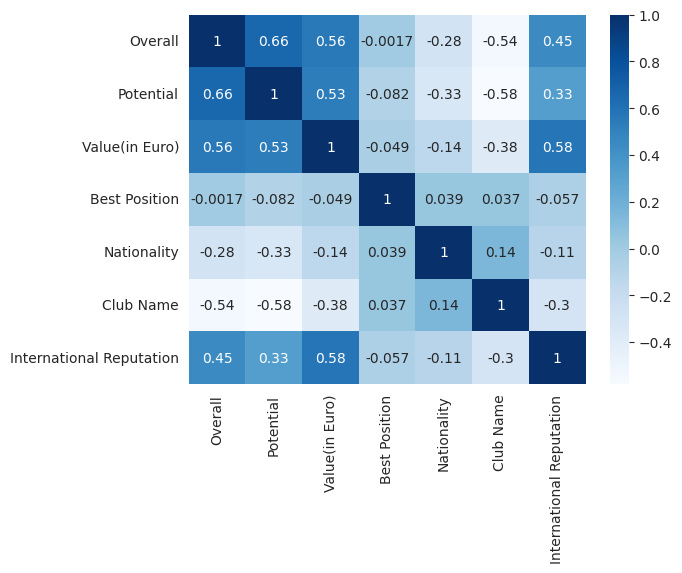

In [116]:
variables = ["Overall", "Potential", "Value(in Euro)", "Best Position","Nationality","Club Name","International Reputation"]
variables_corr = df[variables]
correlacion = variables_corr.corr()
sns.set_style("whitegrid")

sns.heatmap(correlacion, annot=True, cmap='Blues')


En esta matriz de correlación podemos identificar algunas relaciones clave, como lo son la importancia de la reputación internacional en los futbolistas a la hora de conseguir mejores valoraciones, potenciales y valor en euros.

Tambien resalta el ver como la valoración general está muy bajamente relacionada al equipo donde se encuentran los jugadores, algo que podía parecer justo lo contrario, dando a entender así que se hace especial enfasis en las caracteristicas y calidad del jugador en cuestión, dejando de lado la calidad del club en el que compite.


# ***ENTRENAMIENTO***

Para buscar un conjunto de datos clasificable y así encontrar nuestro ground truth, realizaremos un filtro de jugadores potenciales a ser elegidos por la prediccion.

In [117]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

Buscaremos algun outlier que pueda alterar el comportamiento de nuestro analisis, para ello realizamos la siguiente grafica:

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-118-901d89e2e222>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


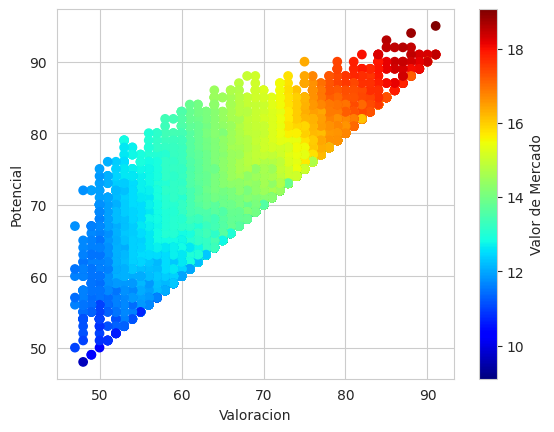

In [118]:
#Relacion entre Potencial, Valoracion general y Valor de mercado para encontrar posibles OUTLIERS

overall = df['Overall']
potencial = df['Potential']
market_value = df['Value(in Euro)']
colors = np.log(market_value)
cmap = plt.cm.get_cmap('jet')
plt.scatter(overall, potencial, c=colors, cmap=cmap)
plt.xlabel('Valoracion')
plt.ylabel('Potencial')
cbar = plt.colorbar()
cbar.set_label('Valor de Mercado')
plt.show()

In [119]:
#Se incluyen 2 columnas extras para la fase de entrenamiento.

df['Avg_Score'] = (df['Potential'] + df['Overall'])/2
df['Potential_Winner'] = np.where((df['Overall'] > 80) & (df['Age'] >= 30) & (df['International Reputation'] >= 3), 1,
                                  np.where((df['Age'] < 30) & (df['Potential'] > 80), 1, 0))

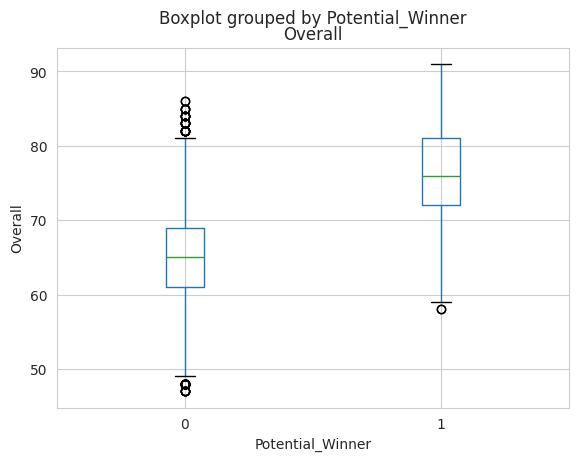

In [120]:
df.boxplot(column='Overall', by='Potential_Winner')
# Etiquetas de los ejes
plt.xlabel('Potential_Winner')
plt.ylabel('Overall')

# Mostrar el gráfico
plt.show()

Ahora pasamos a definir las columnas del dataset a usar para nuestro estimador.

In [121]:
ent_col_clf=["International Reputation","Height(in cm)",
         "TotalStats", "BaseStats","Preferred Foot" , "Pace Total" , "Shooting Total", "Passing Total",
       "Dribbling Total", "Defending Total", "Physicality Total",'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',"Potential_Winner"]

#Se define el dataset a entrenar
entrenamiento = df[ent_col_clf]

X = entrenamiento.values[:, :-1]
y = entrenamiento.values[:, -1]

X, y = shuffle(X, y, random_state=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

Procedemos a calcular la precisión en cada uno de los 4 métodos vistos en clase, los cuales serán: GaussianNB, Decision Trees, Random Forest y Support Vector Machine.

 **GaussianNB**

In [122]:
#Implementacion GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gnb_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

76.78

**Decision Tree**

Método 1

In [123]:
est = DecisionTreeClassifier(max_depth=50)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9279935275080906


Metodo 2

In [124]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree


93.04

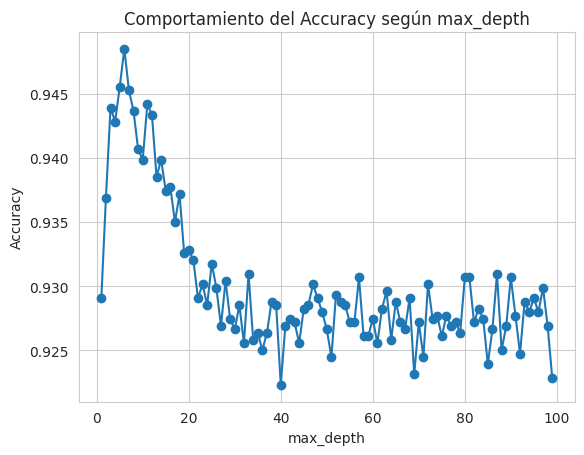

In [125]:
max_depths = range(1, 100)

accuracies0 = []

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies0.append(accuracy)

plt.plot(max_depths, accuracies0, 'o-')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Comportamiento del Accuracy según max_depth')
plt.show()

**Random Forest**

Método 1

In [ ]:
est = RandomForestClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9530744336569579


Método 2

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

95.31

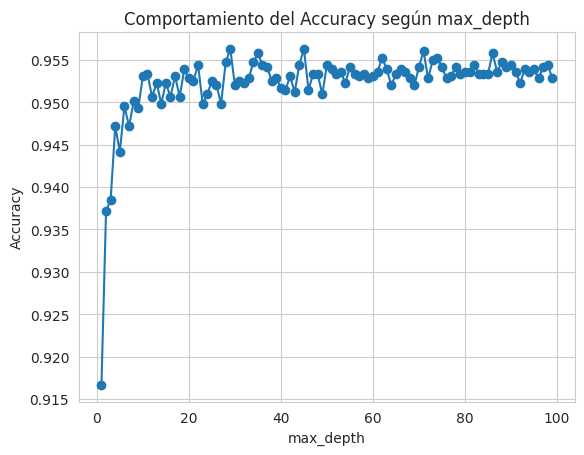

In [126]:
max_depths = range(1, 100)

accuracies = []

for max_depth in max_depths:
    clf = RandomForestClassifier(n_estimators=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(max_depths, accuracies, 'o-')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Comportamiento del Accuracy según max_depth')
plt.show()

**Support Vector Classifier**

Método 1 (RBF)

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc


92.91

Método 2 (Sigmoid)

In [ ]:
svc_sigmoid = SVC(kernel='sigmoid')

svc_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svc_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
accuracy_sigmoid = accuracy_sigmoid*100

Metodo 3 (Poly)

In [ ]:
svc_poly = SVC(kernel='poly')

svc_poly.fit(X_train, y_train)
y_pred_poly = svc.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_poly = accuracy_poly*100

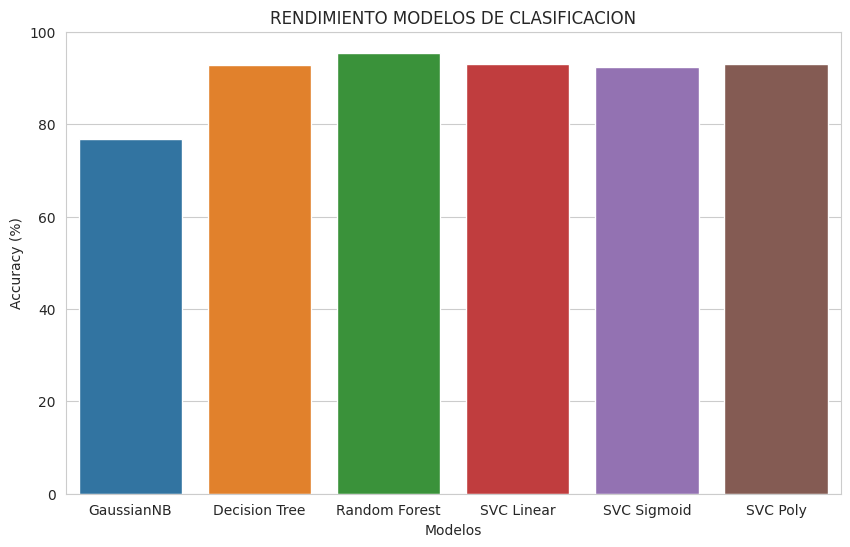

In [ ]:
# Lista de nombres de modelos
model_names = ['GaussianNB', 'Decision Tree', 'Random Forest', 'SVC Linear', 'SVC Sigmoid', 'SVC Poly']

accuracies = [acc_gaussian, acc_decision_tree, acc_random_forest, acc_svc, accuracy_sigmoid, accuracy_poly]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.ylim(0, 100)
plt.xlabel('Modelos')
plt.ylabel('Accuracy (%)')
plt.title('RENDIMIENTO MODELOS DE CLASIFICACION')
plt.show()


# **MODELO**

Seleccionamos el metodo RandomForestClassifier para hacer la clasificacion de nuestros datos, y de paso obtenemos la importancia de cada una de las columnas, esto con el objetivo de verificar si alguna que nos presente algun inconveniente.

In [ ]:
df_1 = entrenamiento.copy()

X = df_1.drop(['Potential_Winner'], axis=1)
y = df_1['Potential_Winner']
X, y = shuffle(X, y, random_state=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=70)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print("Accuracy:", accuracy)

# Obtener la importancia de las características
importances = clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df = importance_df.reset_index(drop=True)
print("\nColumnas mas importantes en la clasificacion:")
importance_df


Accuracy: 95.15

Columnas mas importantes en la clasificacion:


,Feature,Importance
0,Dribbling Total,0.062831
1,Dribbling,0.054588
2,BallControl,0.053781
3,BaseStats,0.041668
4,Standing Tackle,0.036916
5,Composure,0.033950
6,TotalStats,0.033278
7,Sliding Tackle,0.033013
8,Short Passing,0.032951
9,Defending Total,0.029704


Ahora usaremos un metodo de regresion para poder calcular la valoracion general de un jugador que posee un 1 en su columna de Potential_Winner, es decir, que es un potencial balón de oro. Para ello agregamos la columna Overall, que será nuestro groundtruth.

In [ ]:
# Definimos columnas a usar, las mismas columnas de la clasificacion, pero le agregamos la columna
# Overall
ent_col_reg= (ent_col_clf.copy())+ ["Overall"]

entrenamiento = df[ent_col_reg]
len(ent_col_reg)

41

Posteriormente, cronstruiremos nuestro modelo de regresión basado en DecisionTreeRegressor, con el proposito de predecir la Valoración General (Overall) con respecto a las estadisticas con las cuales el modelo entrenó. Este proceso se relizara un número N de veces para una mayor precisión de los datos.

In [ ]:
#Copiamos y eliminamos los jugadores que no son potenciales ganadores
df_2 = entrenamiento.copy()
df_2 =  df_2[df_2['Potential_Winner']!=0]

X = df_2.drop(['Overall'], axis=1)
y = df_2['Overall']
#
jugadores_valoracion = df_2.copy()
jugadores_valoracion['Full Name'] = df[['Known As']]
jugadores_valoracion['Valoracion_General'] = 0
jugadores_valoracion['Prob_BalonDeOro'] = 0
acc = []
for i in tqdm(range(1,101)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    reg_model = DecisionTreeRegressor(max_depth=20, min_samples_leaf=6)
    reg_model.fit(X_train, y_train)
    y_pred = reg_model.predict(X_test)
    r = r2_score(y_test, y_pred)
    acc.append(r)

    jugadores_valoracion['Valoracion_General'] += reg_model.predict(X)
    max_valoracion = jugadores_valoracion['Valoracion_General'].max()
    jugadores_valoracion['Prob_BalonDeOro'] += (jugadores_valoracion['Valoracion_General'] == max_valoracion).astype(int)

jugadores_valoracion['Valoracion_General'] /= i
jugadores_valoracion['Valoracion_General'] = np.round(jugadores_valoracion['Valoracion_General'], 3)
jugadores_valoracion['Prob_BalonDeOro'] = np.round((jugadores_valoracion['Prob_BalonDeOro'] / jugadores_valoracion['Prob_BalonDeOro'].sum())*100, 2)
jugadores_valoracion =jugadores_valoracion.sort_values('Valoracion_General', ascending=False)
jugadores_valoracion = jugadores_valoracion[['Full Name', 'Valoracion_General', 'Prob_BalonDeOro']]




100%|██████████| 100/100 [00:07<00:00, 12.87it/s]


Obtenemos una lista de los mejores jugadores, con el promedio de la valoracion general dada por la regresión, y la probabilidad de ser los primeros valorados, la cual es por lo tanto, la probabilidad de estos jugadores a ganar el Balón de oro en la actualidad (2023) al terminar las iteraciones.

In [ ]:
jugadores_valoracion.head(10)

,Full Name,Valoracion_General,Prob_BalonDeOro
4,K. Mbappé,90.127,14.14
5,M. Salah,90.120,12.46
3,K. De Bruyne,90.105,25.93
1,K. Benzema,90.105,3.03
0,L. Messi,90.103,29.63
2,R. Lewandowski,90.097,11.45
8,Cristiano Ronaldo,90.080,2.02
12,H. Son,89.876,1.01
10,H. Kane,89.826,0.00
14,J. Oblak,89.773,0.00


Procedemos a graficar para ver de una manera mas clara

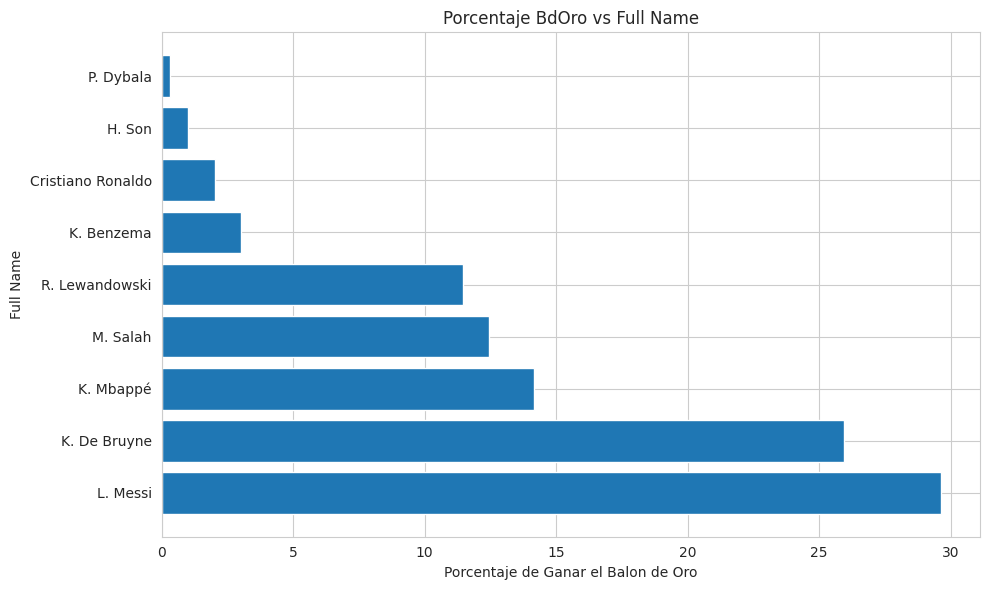

In [ ]:
jugadores_valoracion =jugadores_valoracion.sort_values('Prob_BalonDeOro', ascending=False)

condicion = jugadores_valoracion["Prob_BalonDeOro"] > 0
cantidad = condicion.sum()
#Graficar "Maximo_Valoracion" vs "Full Name" con nombres a la izquierda
plt.figure(figsize=(10, 6))
plt.barh(jugadores_valoracion['Full Name'].head(cantidad), jugadores_valoracion['Prob_BalonDeOro'].head(cantidad))
plt.xlabel('Porcentaje de Ganar el Balon de Oro')
plt.ylabel('Full Name')
plt.title('Porcentaje BdOro vs Full Name')
plt.tight_layout()
plt.show()

### **ESTUDIO A FUTURO (5 AÑOS)**

Posteriormente, crearemos un modelo de valoración en el cual los jugadores variaran sus estadísticas con respecto a su edad.

Esta se rige de la siguiente manera:

- Todo jugador J> 33 años decrecerá un 11% en todas sus estadísticas, y un 12% de Valoración.

- Todo jugador J entre 21-25 años elevará todas sus estadisticas en un 4%.

- Todo jugador J< 21 años elevará todas sus estadísticas en un 10% a excepción de su Valoración a priori, la cual aumentará en 20%.

In [ ]:
datasetprueba = df.copy()
for column in datasetprueba.select_dtypes(include=['int64']):
     datasetprueba[column] = datasetprueba[column].astype(float)

In [ ]:
#@title *Definimos una funcion para simular una temporada* { display-mode: "form" }

def Simular_5años(datasetprueba):

    #PARA LOS MAYORES DE 33
    columnas_excluir = ['Age','Known As', 'Full Name', 'Overall', 'Potential', 'Positions Played', 'Best Position',
                        'Nationality', 'Height(in cm)', 'Club Name', 'Club Position', 'Contract Until',
                        'Preferred Foot', 'International Reputation', 'Estilo', 'Potential_Winner', 'National Team Name','Avg_Score']
    condicion = datasetprueba['Age'] > 33
    datasetprueba.loc[datasetprueba['Age'] > 33, 'Avg_Score'] *= 0.88
    columnas_reducir = datasetprueba.columns[~datasetprueba.columns.isin(columnas_excluir)]
    datasetprueba.loc[condicion, columnas_reducir] *= 0.89

    #ENTRE 21-25
    columnas_excluir = ['Age','Known As', 'Full Name', 'Overall', 'Potential', 'Positions Played', 'Best Position',
                        'Nationality', 'Height(in cm)', 'Club Name', 'Club Position', 'Contract Until',
                        'Preferred Foot', 'International Reputation', 'Estilo', 'Potential_Winner', 'National Team Name','Avg_Score']
    condicion = (datasetprueba['Age'] >= 21) & (datasetprueba['Age'] <= 25)
    columnas_reducir = datasetprueba.columns[~datasetprueba.columns.isin(columnas_excluir)]
    datasetprueba.loc[condicion, columnas_reducir] *= 1.04

    #MENOS DE 21
    columnas_excluir = ['Age','Known As', 'Full Name', 'Overall', 'Potential', 'Positions Played', 'Best Position',
                        'Nationality', 'Height(in cm)', 'Club Name', 'Club Position', 'Contract Until',
                        'Preferred Foot', 'International Reputation', 'Estilo', 'Potential_Winner', 'National Team Name','Avg_Score']
    condicion = datasetprueba['Age'] < 21
    columnas_reducir = datasetprueba.columns[~datasetprueba.columns.isin(columnas_excluir)]
    datasetprueba.loc[condicion, columnas_reducir] *= 1.1
    datasetprueba.loc[datasetprueba['Age'] < 21, 'Avg_Score'] *= 1.2
    datasetprueba["Age"] += 5

    return datasetprueba

Visualizamos como ha quedado nuestro dataset de 5 años en el futuro.

In [ ]:
datasetprueba = Simular_5años(datasetprueba)
datasetprueba.head(10)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),...,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Estilo,Avg_Score,Potential_Winner
0,L. Messi,Lionel Messi,91.0,91.0,48060000.0,RW,839.0,0.0,40.0,169.0,...,82.77,83.66,66.75,85.44,17.80,31.15,21.36,Mediocampista,80.08,1.0
1,K. Benzema,Karim Benzema,91.0,91.0,56960000.0,"CF,ST",840.0,1.0,39.0,185.0,...,81.88,79.21,74.76,80.10,38.27,21.36,16.02,Atacante,80.08,1.0
2,R. Lewandowski,Robert Lewandowski,91.0,91.0,84000000.0,ST,841.0,2.0,38.0,185.0,...,94.00,81.00,90.00,88.00,35.00,42.00,19.00,Atacante,91.00,1.0
3,K. De Bruyne,Kevin De Bruyne,91.0,91.0,107500000.0,"CM,CAM",842.0,3.0,36.0,181.0,...,88.00,94.00,83.00,89.00,68.00,65.00,53.00,Mediocampista,91.00,1.0
4,K. Mbappé,Kylian Mbappé,91.0,95.0,198120000.0,"ST,LW",841.0,1.0,28.0,182.0,...,95.68,86.32,83.20,91.52,27.04,35.36,33.28,Atacante,93.00,1.0
5,M. Salah,Mohamed Salah,90.0,90.0,115500000.0,RW,843.0,4.0,35.0,175.0,...,92.00,85.00,86.00,92.00,38.00,43.00,41.00,Atacante,90.00,1.0
6,T. Courtois,Thibaut Courtois,90.0,91.0,90000000.0,GK,844.0,3.0,35.0,199.0,...,13.00,44.00,27.00,66.00,20.00,18.00,16.00,Portero,90.50,1.0
7,M. Neuer,Manuel Neuer,90.0,90.0,12015000.0,GK,844.0,5.0,41.0,193.0,...,10.68,62.30,41.83,62.30,15.13,8.90,9.79,Portero,79.20,1.0
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90.0,90.0,36490000.0,ST,841.0,6.0,42.0,187.0,...,84.55,67.64,80.10,84.55,21.36,28.48,21.36,Atacante,79.20,1.0
9,V. van Dijk,Virgil van Dijk,90.0,90.0,98000000.0,CB,845.0,7.0,35.0,193.0,...,47.00,65.00,62.00,90.00,92.00,92.00,86.00,Defensa,90.00,1.0


Posteriormente se clasificarán estos jugadores en si son Potenciales Ganadores o no, una vez se han actualizado todas las estadísticas individuales.




In [ ]:
df_5años = datasetprueba.copy()
df_5años = df_5años[ent_col_clf]

X = df_5años.drop(['Potential_Winner'], axis=1)  # Características sin la columna 'Potential_Winner'
df_5años['Potential_Winner'] = clf.predict(X)
datasetprueba.update(df_5años)

Posteriormente, volvemos a construir nuestro modelo de regresión basado en DecisionTreeRegressor, con el proposito de predecir la Valoración General (Overall) de nuestro nuevo df. Este proceso se relizara un número N de veces para una mayor precisión de los datos.

In [ ]:
df_5años['Avg_Score'] = df['Avg_Score']
df_5años =  df_5años[df_5años['Potential_Winner']!=0]
jugadores_valoracion5años = df_5años.copy()
jugadores_valoracion5años['Full Name'] = df[['Full Name']]
jugadores_valoracion5años['Valoracion_General'] = 0
jugadores_valoracion5años['Prob_BalonDeOro'] = 0

X = df_5años.drop(['Avg_Score'], axis=1)
y = df_5años['Avg_Score']

acc = []
#Utilizar tqdm para el ciclo for
for i in tqdm(range(1,101)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    reg_model = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
    reg_model.fit(X_train, y_train)
    y_pred = reg_model.predict(X_test)
    mse = r2_score(y_test, y_pred)
    acc.append(mse)

    jugadores_valoracion5años['Valoracion_General'] += reg_model.predict(X)
    # Actualizar la columna 'Maximo_Valoracion' si el valor actual es el máximo
    max_valoracion = jugadores_valoracion5años['Valoracion_General'].max()
    jugadores_valoracion5años['Prob_BalonDeOro'] += (jugadores_valoracion5años['Valoracion_General'] == max_valoracion).astype(int)
    i=i+1

jugadores_valoracion5años['Valoracion_General'] /= i
jugadores_valoracion5años['Valoracion_General'] = np.round(jugadores_valoracion5años['Valoracion_General'], 3)
jugadores_valoracion5años['Prob_BalonDeOro'] = np.round((jugadores_valoracion5años['Prob_BalonDeOro'] / jugadores_valoracion5años['Prob_BalonDeOro'].sum())*100, 2)

jugadores_valoracion5años =jugadores_valoracion5años.sort_values('Valoracion_General', ascending=False)
jugadores_valoracion5años = jugadores_valoracion5años[['Full Name', 'Valoracion_General', 'Prob_BalonDeOro']]

datasetprueba['Overall'].update(jugadores_valoracion5años['Valoracion_General'])
print('\nR2:',np.mean(acc))


100%|██████████| 100/100 [00:02<00:00, 36.15it/s]


R2: 0.5405631852176287


Obtenemos una lista de los mejores jugadores, con el promedio de la valoracion general dada por la regresión, y la probabilidad de ser los primeros valorados, la cual es por lo tanto, la probabilidad de estos jugadores a ganar el Balón de oro en el futuro cercano al terminar las iteraciones.

In [ ]:
jugadores_valoracion5años.head(15)

,Full Name,Valoracion_General,Prob_BalonDeOro
4,Kylian Mbappé,89.409,51.49
21,Erling Haaland,89.224,21.64
5,Mohamed Salah,89.196,7.46
3,Kevin De Bruyne,88.850,7.46
14,Jan Oblak,88.840,0.00
2,Robert Lewandowski,88.668,5.22
10,Harry Kane,88.600,2.99
6,Thibaut Courtois,88.553,0.00
12,Heung Min Son,88.191,2.99
22,Gianluigi Donnarumma,88.068,0.00


Procedemos a graficar para ver de una manera mas clara

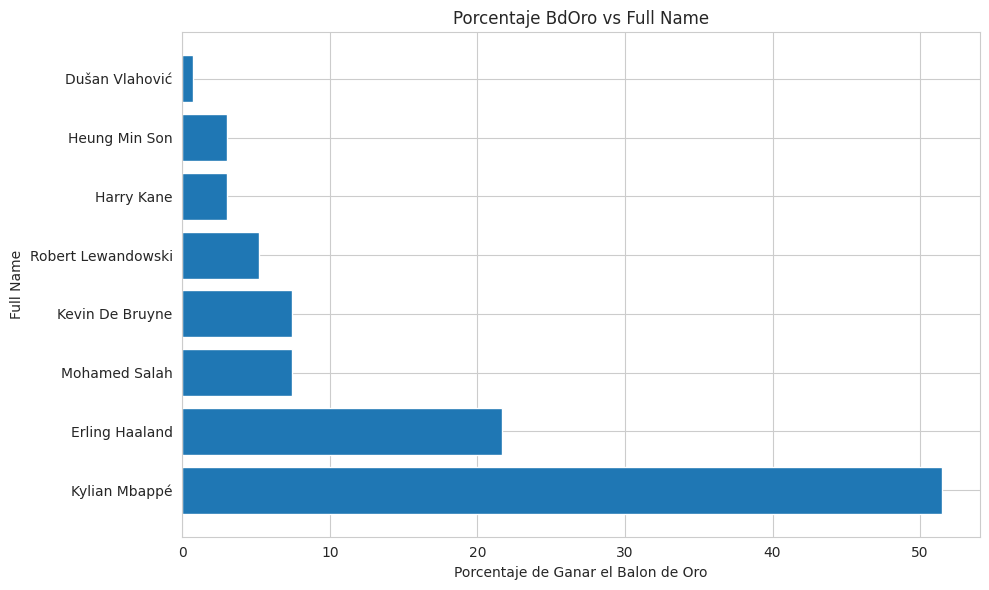

In [ ]:
jugadores_valoracion5años =jugadores_valoracion5años.sort_values('Prob_BalonDeOro', ascending=False)

condicion = jugadores_valoracion5años["Prob_BalonDeOro"] > 0
cantidad = condicion.sum()
#Graficar "Maximo_Valoracion" vs "Full Name" con nombres a la izquierda
plt.figure(figsize=(10, 6))
plt.barh(jugadores_valoracion5años['Full Name'].head(cantidad), jugadores_valoracion5años['Prob_BalonDeOro'].head(cantidad))
plt.xlabel('Porcentaje de Ganar el Balon de Oro')
plt.ylabel('Full Name')
plt.title('Porcentaje BdOro vs Full Name')
plt.tight_layout()
plt.show()

### **2DO ESTUDIO A FUTURO (10 AÑOS)**

Se vuelve a realizar la actualización de estadisticas siguiendo los criterios vistos en el 1er estudio a futuro.



In [ ]:
datasetprueba = Simular_5años(datasetprueba)


In [ ]:
datasetprueba.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),...,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Estilo,Avg_Score,Potential_Winner
0,L. Messi,Lionel Messi,91.000,91.0,42773400.0,RW,839.0,0.0,45.0,169.0,...,73.6653,74.4574,59.4075,76.0416,15.8420,27.7235,19.0104,Mediocampista,70.4704,0.0
1,K. Benzema,Karim Benzema,91.000,91.0,50694400.0,"CF,ST",840.0,1.0,44.0,185.0,...,72.8732,70.4969,66.5364,71.2890,34.0603,19.0104,14.2578,Atacante,70.4704,0.0
2,R. Lewandowski,Robert Lewandowski,88.668,91.0,74760000.0,ST,841.0,2.0,43.0,185.0,...,83.6600,72.0900,80.1000,78.3200,31.1500,37.3800,16.9100,Atacante,80.0800,1.0
3,K. De Bruyne,Kevin De Bruyne,88.850,91.0,95675000.0,"CM,CAM",842.0,3.0,41.0,181.0,...,78.3200,83.6600,73.8700,79.2100,60.5200,57.8500,47.1700,Mediocampista,80.0800,1.0
4,K. Mbappé,Kylian Mbappé,89.409,95.0,198120000.0,"ST,LW",841.0,1.0,33.0,182.0,...,95.6800,86.3200,83.2000,91.5200,27.0400,35.3600,33.2800,Atacante,93.0000,1.0


Luego se clasificarán por ultima vez estos jugadores en si son Potenciales Ganadores o no, una vez se han actualizado todas las estadísticas individuales.






In [ ]:
df_10años = datasetprueba.copy()
df_10años = df_10años[ent_col_clf]
X = df_10años.drop(['Potential_Winner'], axis=1)  # Características sin la columna 'Potential_Winner'
df_10años['Potential_Winner'] = clf.predict(X)
datasetprueba.update(df_10años)


Construimos por última vez nuestro modelo de regresión basado en DecisionTreeRegressor, con el proposito de predecir la Valoración General (Overall) de nuestro nuevo df (FUTURO LEJANO). Este proceso se relizara un número N de veces para una mayor precisión de los datos.

In [ ]:
df_10años['Potential'] = df['Potential']
df_10años =  df_10años[df_10años['Potential_Winner']!=0]
jugadores_valoracion10años = df_10años.copy()
jugadores_valoracion10años['Full Name'] = df[['Full Name']]
jugadores_valoracion10años['Valoracion_General'] = 0
jugadores_valoracion10años['Prob_BalonDeOro'] = 0

X = df_10años.drop(['Potential'], axis=1)
y = df_10años['Potential']
acc = []
#Utilizar tqdm para el ciclo for
for i in tqdm(range(1,101)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    reg_model = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
    reg_model.fit(X_train, y_train)
    y_pred = reg_model.predict(X_test)
    mse = r2_score(y_test, y_pred)
    acc.append(mse)

    jugadores_valoracion10años['Valoracion_General'] += reg_model.predict(X)
    # Actualizar la columna 'Maximo_Valoracion' si el valor actual es el máximo
    max_valoracion = jugadores_valoracion10años['Valoracion_General'].max()
    jugadores_valoracion10años['Prob_BalonDeOro'] += (jugadores_valoracion10años['Valoracion_General'] == max_valoracion).astype(int)

jugadores_valoracion10años['Valoracion_General'] /= i
jugadores_valoracion10años['Valoracion_General'] = np.round(jugadores_valoracion10años['Valoracion_General'], 3)
jugadores_valoracion10años['Prob_BalonDeOro'] = np.round((jugadores_valoracion10años['Prob_BalonDeOro'] / jugadores_valoracion10años['Prob_BalonDeOro'].sum())*100, 2)

jugadores_valoracion10años =jugadores_valoracion10años.sort_values('Valoracion_General', ascending=False)
jugadores_valoracion10años = jugadores_valoracion10años[['Full Name', 'Valoracion_General', 'Prob_BalonDeOro']]

datasetprueba['Overall'].update(jugadores_valoracion10años['Valoracion_General'])
print('\nR2:',np.mean(acc))


100%|██████████| 100/100 [00:04<00:00, 22.64it/s]


R2: 0.21795843557849845


Obtenemos una lista de los 15 mejores jugadores, con el promedio de la valoracion general dada por la regresión, y la probabilidad de ser los primeros valorados, la cual es por lo tanto, la probabilidad de estos jugadores a ganar el Balón de oro en el FUTURO LEJANO al terminar las iteraciones.

In [ ]:
jugadores_valoracion10años.head(15)

,Full Name,Valoracion_General,Prob_BalonDeOro
4,Kylian Mbappé,91.307,54.63
82,Pedro González López,91.280,27.78
225,Florian Wirtz,91.139,12.96
63,Vinícius José de Oliveira Júnior,90.751,0.00
302,Jamal Musiala,90.743,0.93
83,Phil Foden,90.687,0.93
124,Jude Bellingham,90.631,0.93
526,Ryan Gravenberch,90.430,0.93
42,Frenkie de Jong,90.274,0.00
541,Eduardo Camavinga,90.207,0.93


Procedemos a graficar para ver de una manera mas clara

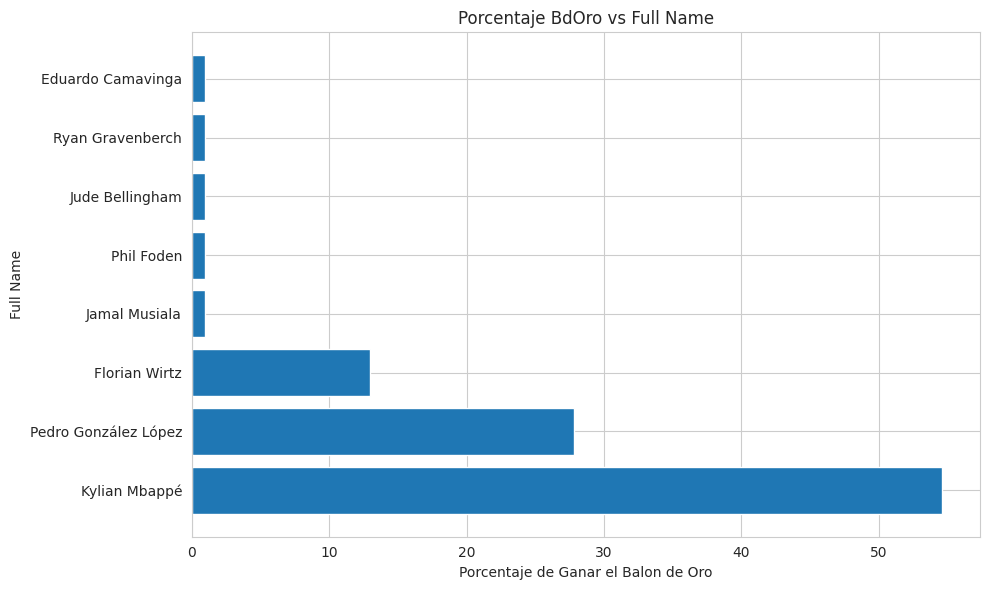

In [ ]:
jugadores_valoracion10años =jugadores_valoracion10años.sort_values('Prob_BalonDeOro', ascending=False)

condicion = jugadores_valoracion10años["Prob_BalonDeOro"] > 0
cantidad = condicion.sum()
#Graficar "Maximo_Valoracion" vs "Full Name" con nombres a la izquierda
plt.figure(figsize=(10, 6))
plt.barh(jugadores_valoracion10años['Full Name'].head(cantidad), jugadores_valoracion10años['Prob_BalonDeOro'].head(cantidad))
plt.xlabel('Porcentaje de Ganar el Balon de Oro')
plt.ylabel('Full Name')
plt.title('Porcentaje BdOro vs Full Name')
plt.tight_layout()
plt.show()

### **Gracias por leer**